In [8]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [51]:
df = pd.read_csv("/content/drive/MyDrive/AI/mnist_dataset.csv")

In [52]:
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

n_features = X.shape[1]
n_classes = 10

W = np.random.randn(n_features, n_classes)

# Random bias vector (shape: n_classes)
b = np.random.randn(n_classes)

# Compute z = w.x + b
z = np.dot(X, W) + b

In [23]:
def softmax(z):
  """
Compute the softmax probabilities for a given input matrix.
Parameters:
z (numpy.ndarray): Logits (raw scores) of shape (m, n), where

- m is the number of samples.
- n is the number of classes.

Returns:
numpy.ndarray: Softmax probability matrix of shape (m, n), where
each row sums to 1 and represents the probability
distribution over classes.

Notes:
- The input to softmax is typically computed as: z = XW + b.
- Uses numerical stabilization by subtracting the max value per row.
"""
  z -= np.max(z, axis=1, keepdims=True)
  exp_z = np.exp(z)
  return exp_z /np.sum(exp_z, axis=1, keepdims=True)

In [24]:
# Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


In [25]:
def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """
    softmax_probs = softmax(z)
    predicted_classes = np.argmax(softmax_probs)

    return predicted_classes

In [28]:
y_pred = predict_softmax(X, W, b)

# Print the predicted labels
print("Predicted class labels:", y_pred)

Predicted class labels: 8


In [59]:
def loss_softmax(y_pred, y):
    """
    Compute the cross-entropy loss for a batch of samples.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (n_samples, n_classes).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n_samples, n_classes).

    Returns:
    float: Cross-entropy loss for the given batch.
    """
    loss = -np.sum(y * np.log(y_pred + 1e-9))  # Add small value to prevent log(0)
    return loss / y.shape[0]  # Return average loss over all samples


In [60]:
# Define correct predictions (low loss scenario)
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True one-hot labels
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])  # High confidence in the correct class

# Define incorrect predictions (high loss scenario)
y_pred_incorrect = np.array([[0.05, 0.05, 0.9],  # Highly confident in the wrong class
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

# Compute loss for both cases
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

# Validate that incorrect predictions lead to a higher loss
assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

# Print results
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.1435
Cross-Entropy Loss (Incorrect Predictions): 2.9957


In [61]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """
    n = X.shape[0]
    total_loss = loss_softmax(X, y)
    return total_loss/n

In [62]:
import numpy as np

# Example 1: Correct Prediction (Closer predictions)
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])  # Feature matrix for correct predictions
y_correct = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, matching predictions)
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])  # Weights for correct prediction
b_correct = np.array([0.1, 0.1])  # Bias for correct prediction

# Example 2: Incorrect Prediction (Far off predictions)
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])  # Feature matrix for incorrect predictions
y_incorrect = np.array([[1, 0], [0, 1]])  # True labels (one-hot encoded, incorrect predictions)
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])  # Weights for incorrect prediction
b_incorrect = np.array([0.5, 0.6])  # Bias for incorrect prediction

# Compute cost for correct predictions
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)

# Compute cost for incorrect predictions
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

# Check if the cost for incorrect predictions is greater than for correct predictions
assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

# Print the costs for verification
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)

print("Test passed!")


Cost for correct prediction: -5.000000411201855e-10
Cost for incorrect prediction: 0.9780057476070365
Test passed!


In [63]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    n = X.shape[0]
    grad_W = (1 / n) * np.dot(X.T, (y_pred - y))
    grad_b = (1 / n) * np.sum(y_pred - y, axis=0)

    return grad_W, grad_b

In [64]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)

print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


In [65]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W  # Update weights
        b -= alpha * grad_b  # Update biases

        # Optionally track the cost
        if show_cost:
            cost = cost_softmax(X, y, W, b)  # Compute the cost using the current W and b
            cost_history.append(cost)

    return W, b, cost_history

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str)       : Path to the CSV file containing MNIST data.
    test_size (float)    : Proportion of the data to use as the test set (default: 0.2).
    random_state (int)   : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """

    # Load dataset
    df = pd.read_csv(csv_file)

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """

    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


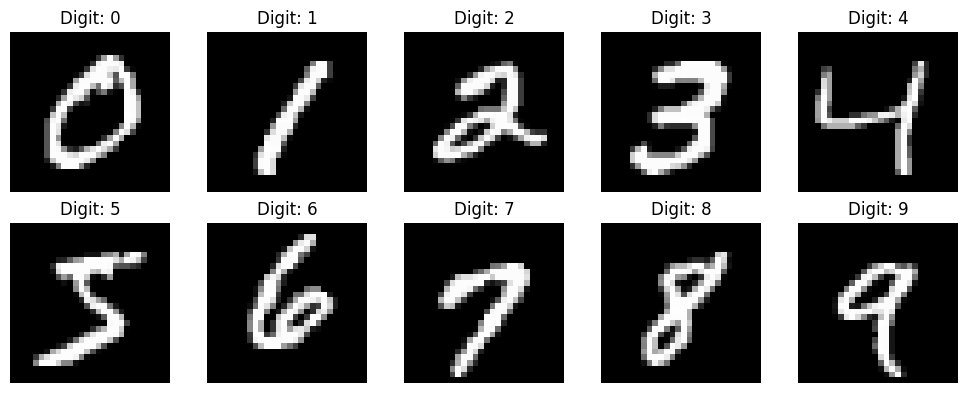

In [67]:
csv_file_path = "/content/drive/MyDrive/AI/mnist_dataset.csv"  # Path to saved dataset
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

In [68]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


In [69]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (48000, 784)
Test data shape: (12000, 784)


Iteration 0, Cost: 2.3362392451045024
Iteration 100, Cost: 2.2446128795530345
Iteration 200, Cost: 2.2319427877809392
Iteration 300, Cost: 2.230012440925757
Iteration 400, Cost: 2.229693312854744
Iteration 500, Cost: 2.2296372156454627
Iteration 600, Cost: 2.22962688179072
Iteration 700, Cost: 2.2296249055897492
Iteration 800, Cost: 2.2296245155222487
Iteration 900, Cost: 2.229624436305935


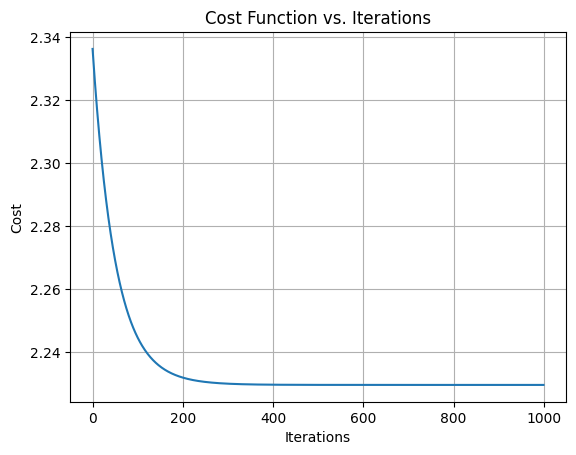

In [71]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Example data
X_train = np.random.randn(48000, 784)  # Random data for illustration (48000 samples, 784 features)
y_train = np.random.randint(0, 10, 48000)  # Random integer labels (10 classes)
y_test = np.random.randint(0, 10, 10000)  # Random test labels

# OneHotEncode y_train and y_test
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

d = X_train.shape[1]  # Number of features
c = y_train.shape[1]  # Number of classes

# Initialize weights and biases
W = np.random.randn(d, c) * 0.01
b = np.zeros(c)

# Hyperparameters
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Gradient descent function (with proper shape checking)
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        # Compute logits (z) and predictions (y_pred)
        z = np.dot(X, W) + b
        y_pred = softmax(z)

        # Compute loss (cross-entropy)
        cost = loss_softmax(y_pred, y)
        cost_history.append(cost)

        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and biases
        W -= alpha * grad_W
        b -= alpha * grad_b

        if show_cost and i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return W, b, cost_history

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1
